<a href="https://colab.research.google.com/github/AnastasiaMoiseyev/STA2023_Fall_2022/blob/main/Anastasia_Stats_Lab_9_Linear_Model_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab #9


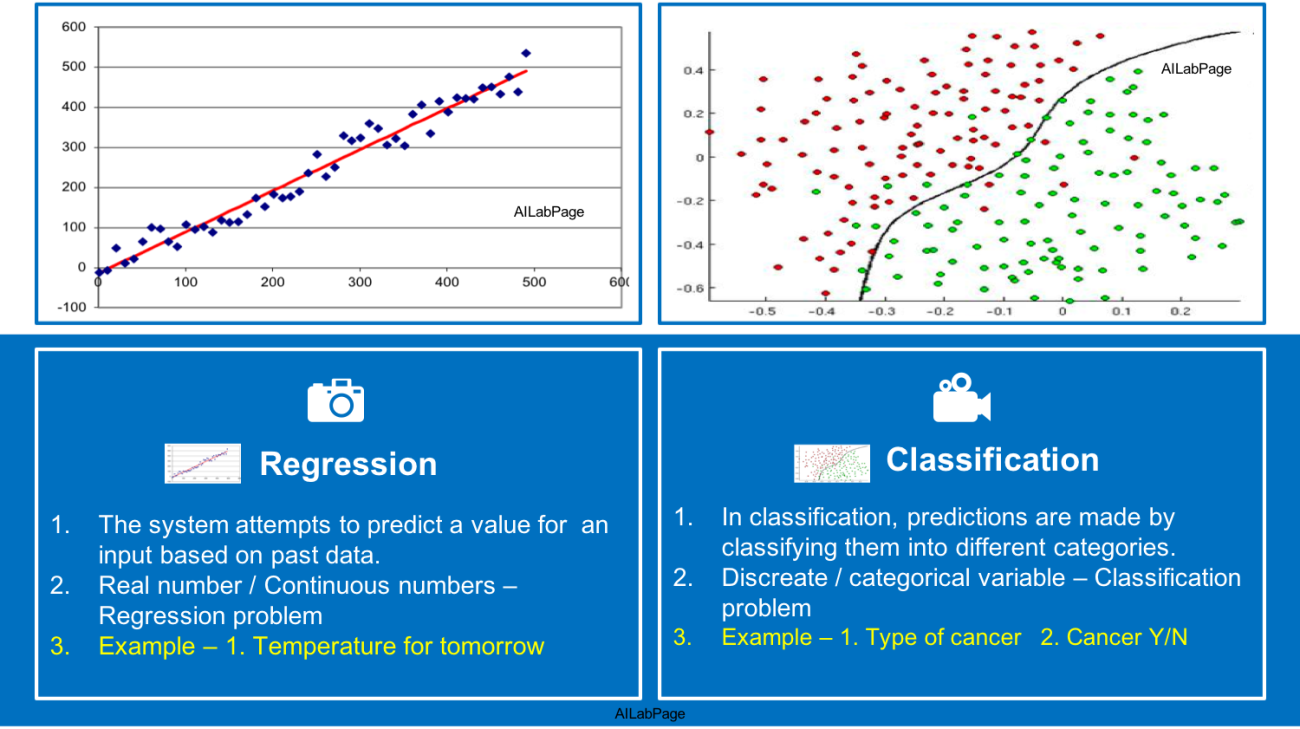

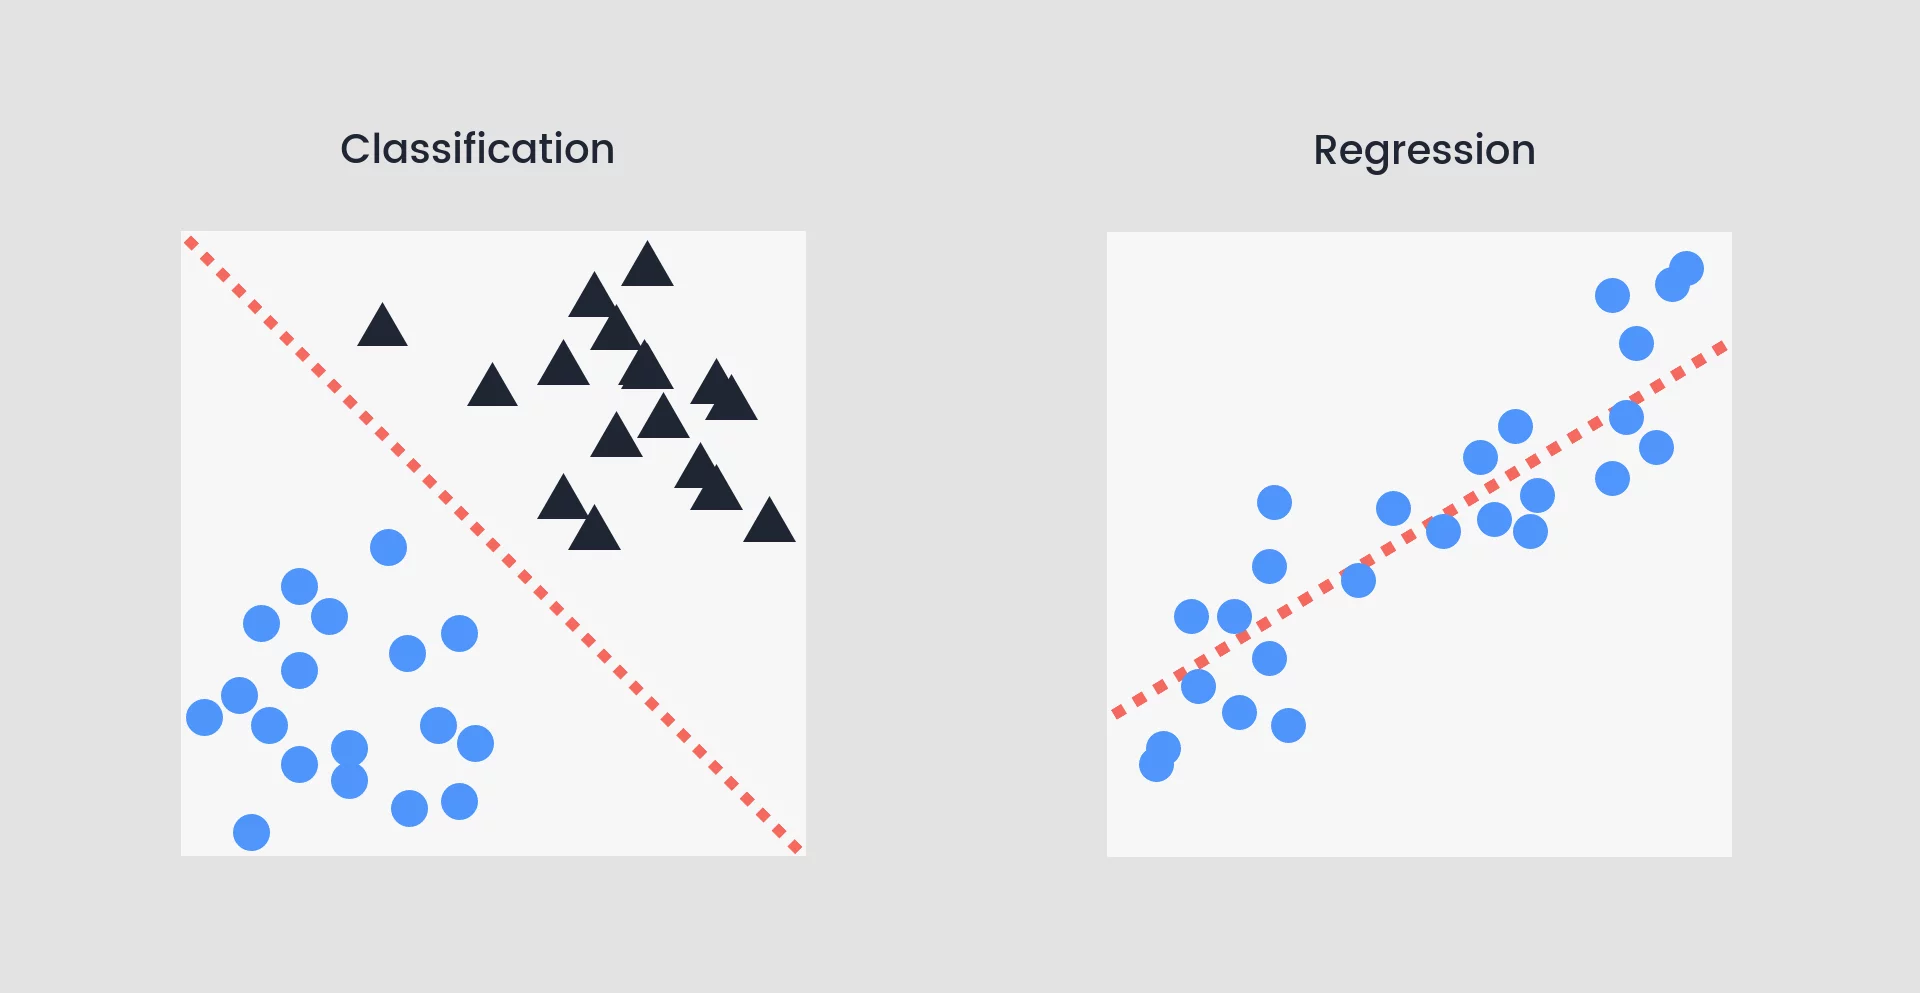

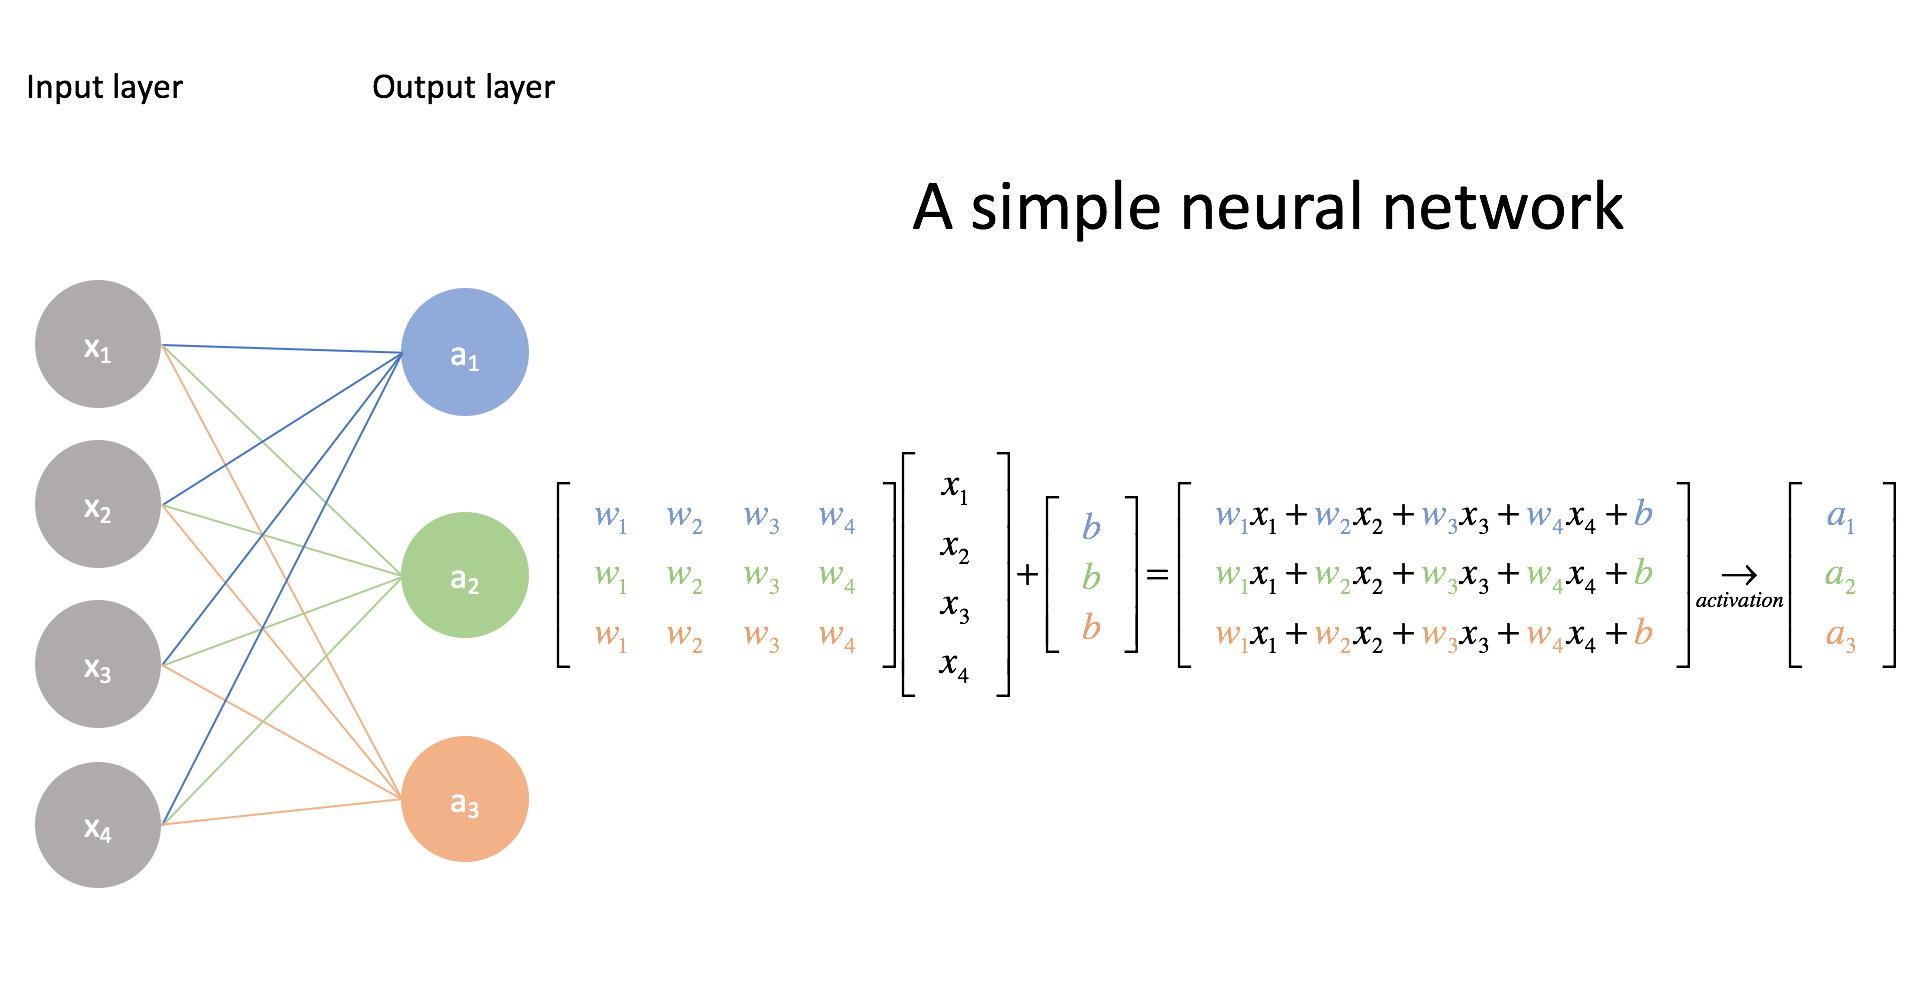

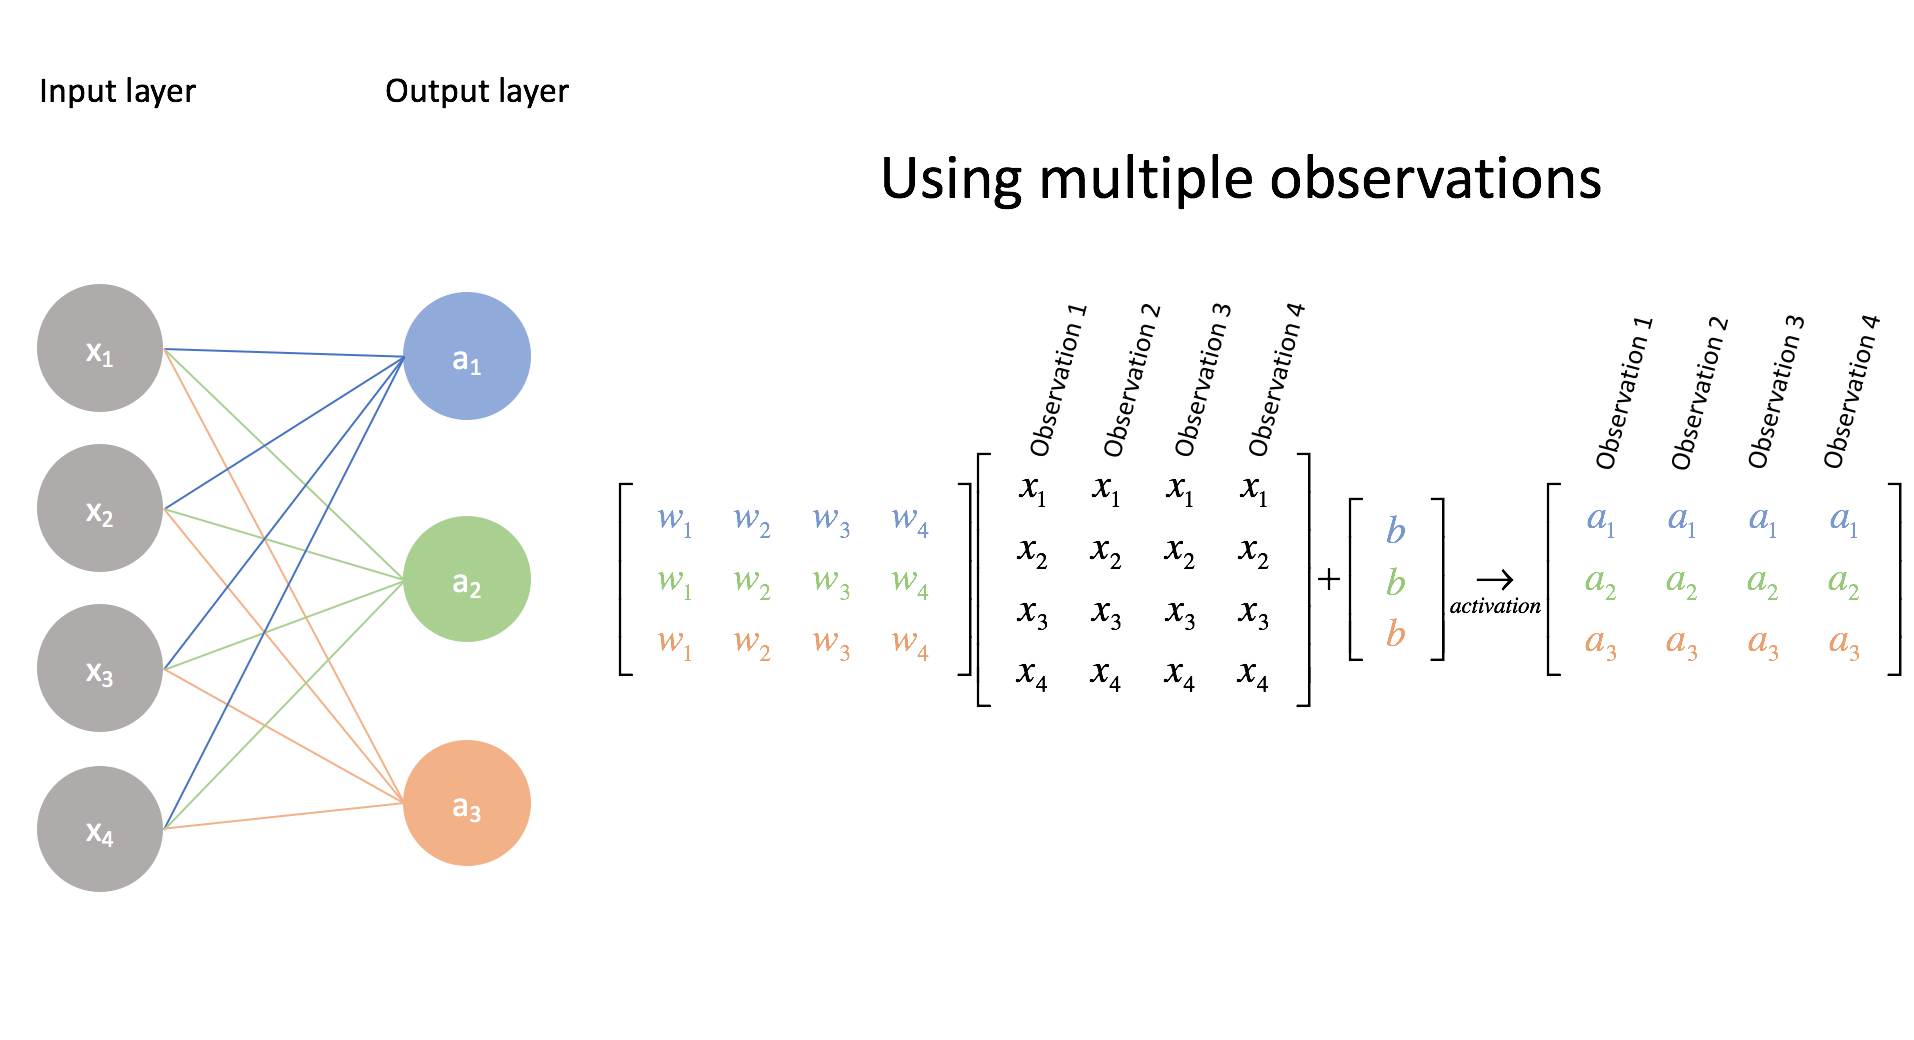

In [66]:
# Implementation of matplotlib function 
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-t37tthgg
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-t37tthgg
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [67]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots() #plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
    #Thus when using fig, ax = plt.subplots() we unpack this tuple into the variables fig and ax .
    im = ax.imshow(x, cmap = 'gray') #imshow expects RGB images adopting the straight (unassociated) alpha representation.
    ax.axis('off') #A single object of the axes.
    fig.set_size_inches(10, 10) #is used to set the figure size in inches.
    plt.show() #used to display figure

In [69]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [70]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [71]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [72]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [73]:
X.shape #the dimensions of the array

(60000, 1, 28, 28)

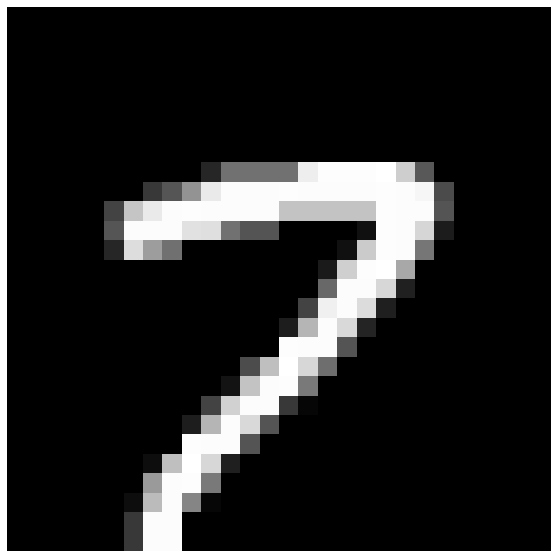

In [74]:
plot(X[123,0,0:28,0:28]) #The plot()  is used to draw points (markers) in a diagram.

In [75]:
Y[123] #y values 

7

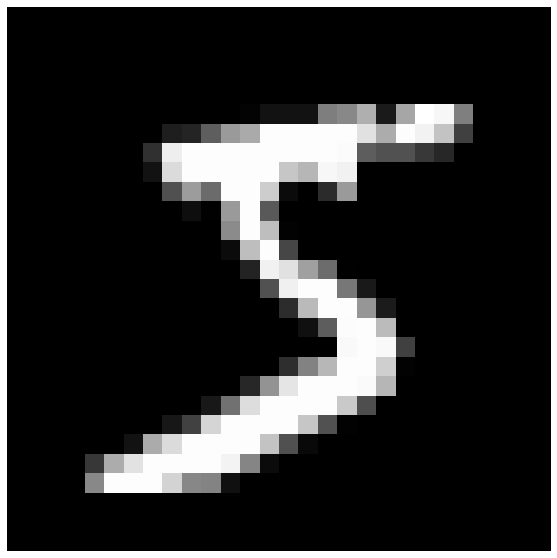

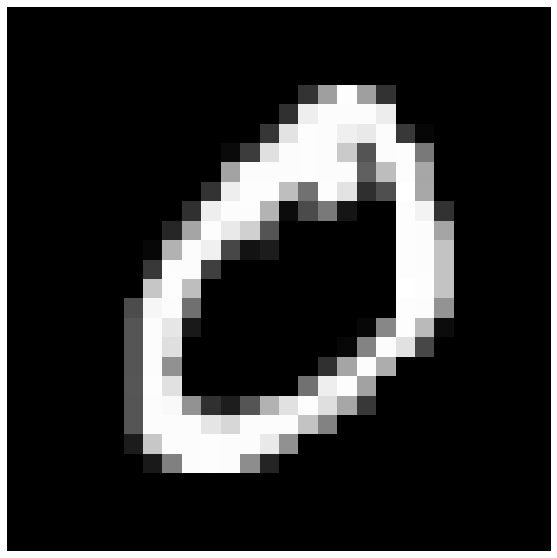

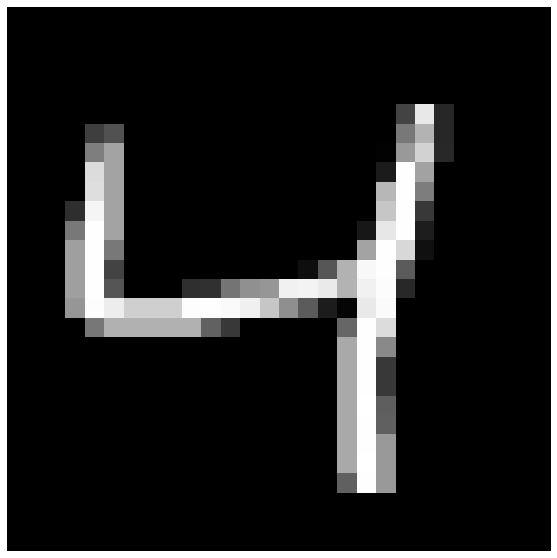

In [76]:
for i in range(3):
    plot(X[i,0,:,:])

    #range () generates the immutable sequence of numbers starting from the given start integer to the stop integer

In [77]:
Y

array([5, 0, 4, ..., 5, 6, 8])

In [78]:
X[0:25,0,:,:].shape

(25, 28, 28)

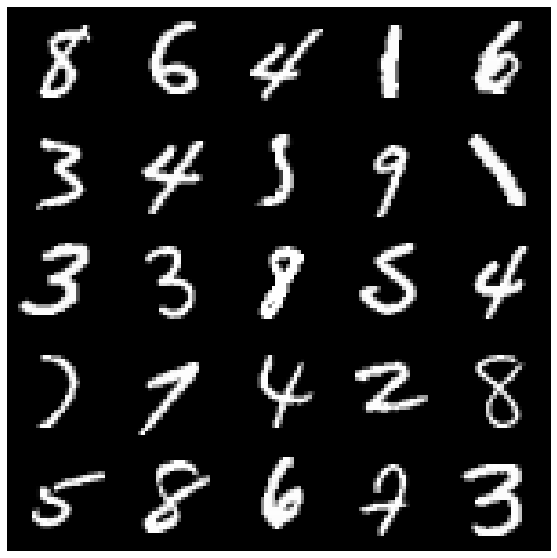

In [79]:
montage_plot(X[125:150,0,:,:])

In [80]:
X.shape[0]

60000

In [81]:
X_test.shape

(10000, 1, 28, 28)

In [82]:
X.shape[0]

60000

In [83]:
X_test.shape[0]

10000

In [84]:
28*28 #multiply

784

In [85]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [86]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [87]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

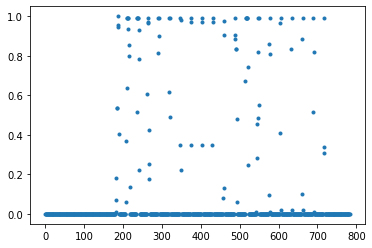

In [88]:
plt.plot(X[100],'.')
#plot () is used to draw points (markers) in a diagram.
# By default, the plot() functions draws a line from point to point. 
#The function takes parameters for specifying points in the diagram. 
#Parameter 1 is an array containing the points on the x-axis.

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

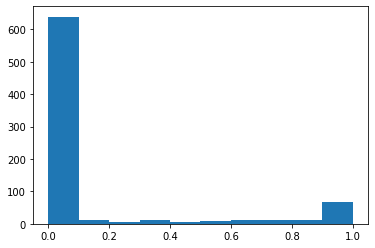

In [89]:
plt.hist(X[0]) #We use the hist() function to create histograms. 
#hist() will use an array of numbers to create a histogram, the array is sent into the function as an argument.

In [90]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [91]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  # It is used to fetch URLs (Uniform Resource Locators). 
wget.download(url,"W.data")

'W (1).data'

In [92]:
W = torch.load("W.data")

In [93]:
W.shape

torch.Size([784, 10])

In [94]:
X.shape

torch.Size([60000, 784])

In [95]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots() #plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
    #Thus when using fig, ax = plt.subplots() we unpack this tuple into the variables fig and ax .
    im = ax.imshow(x, cmap = 'gray')  #imshow expects RGB images adopting the straight (unassociated) alpha representation.
    ax.axis('off')#A single object of the axes.
    fig.set_size_inches(10, 100)#is used to set the figure size in inches.
    plt.show()#used to display figure

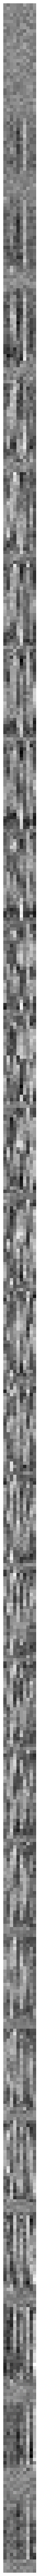

In [96]:
plot(W[0:784,:10])

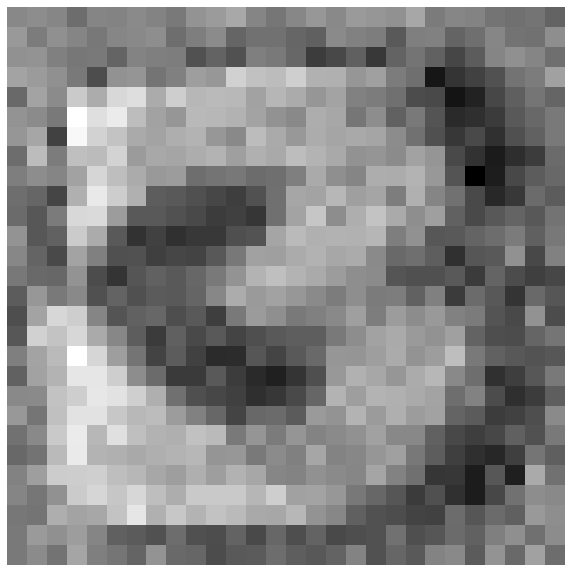

In [97]:
plot(W[:,3].reshape(28,28)) #reshape -> changing the shape of an array

In [98]:
X.shape

torch.Size([60000, 784])

In [99]:
b = 40

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [100]:
x,y = get_batch('train')

In [101]:
x.shape

torch.Size([40, 784])

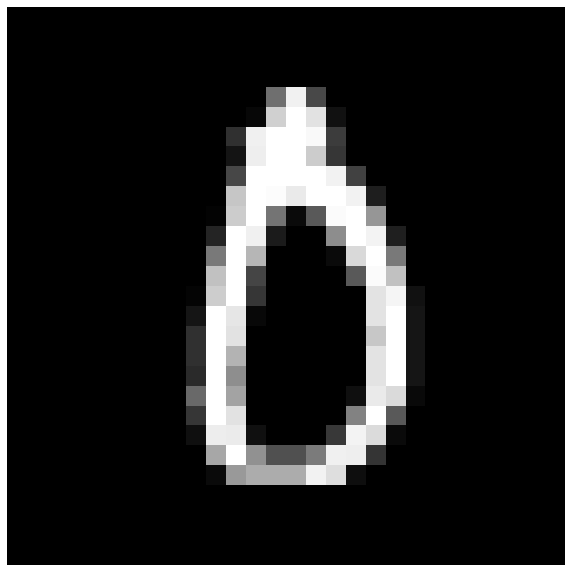

In [102]:
plot(x[0].reshape(28,28))

In [103]:
y

tensor([0., 5., 3., 1., 6., 8., 9., 2., 3., 6., 7., 3., 4., 9., 9., 5., 7., 6.,
        0., 7., 9., 7., 4., 1., 8., 8., 2., 1., 7., 8., 7., 3., 5., 1., 7., 6.,
        1., 7., 9., 8.], device='cuda:0')

In [104]:
x.shape, W.shape

(torch.Size([40, 784]), torch.Size([784, 10]))

In [105]:
torch.matmul(x,W).shape

torch.Size([40, 10])

In [106]:
(x@W).shape

torch.Size([40, 10])

In [107]:
y = x@W

In [108]:
y.shape

torch.Size([40, 10])

In [109]:
y

tensor([[ 3.2924e+00, -5.7726e+00, -1.7044e-01,  1.3008e+00, -4.4421e+00,
          4.6569e-01, -1.1912e+00, -2.4233e+00,  5.1953e-01, -5.0228e-01],
        [-3.8436e-01, -5.0991e+00, -3.9270e+00, -3.5032e+00, -3.6310e+00,
          6.8512e+00, -1.4765e+00, -4.2701e-01, -2.2912e-01, -3.4639e+00],
        [-2.6447e+00,  1.6442e-01,  1.4751e+00,  1.0533e+01, -6.4284e+00,
          2.2906e+00, -3.2031e+00, -8.6151e+00,  1.1800e+00, -3.9522e+00],
        [-5.4210e+00,  1.0354e+01, -1.5568e-01,  2.7311e+00, -4.4543e+00,
         -3.3010e+00, -2.8535e-01, -1.8562e+00,  1.3160e+00,  1.0202e+00],
        [-1.9683e+00, -1.3523e+01,  2.1414e+00, -4.2938e+00, -1.7682e-01,
         -4.6572e-01,  9.2008e+00, -4.1476e+00, -4.7054e+00, -2.2493e+00],
        [ 2.4291e+00, -1.2538e+01,  7.9440e-01,  3.5848e+00, -1.6243e+00,
          4.8601e+00, -1.4299e+00, -1.2581e+01,  7.0395e+00, -3.0686e+00],
        [-4.0944e+00, -3.9884e+00, -3.4321e+00,  2.9366e-01,  3.7546e+00,
         -1.7719e+00, -2.1590e+0

In [110]:
torch.argmax(y,1)

tensor([0, 5, 3, 1, 6, 8, 9, 2, 5, 6, 7, 3, 4, 2, 9, 8, 7, 6, 0, 7, 9, 7, 4, 1,
        8, 8, 2, 1, 7, 3, 7, 3, 5, 1, 7, 6, 1, 7, 0, 8], device='cuda:0')

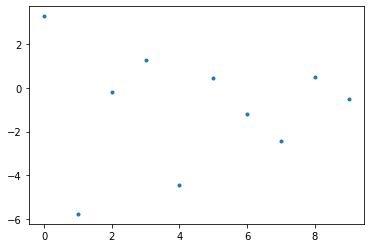

In [111]:
plt.plot(y[0].cpu().detach().numpy().T,'.')

https://eleif.net/clicktimer.html

In [112]:
x@W

tensor([[ 3.2924e+00, -5.7726e+00, -1.7044e-01,  1.3008e+00, -4.4421e+00,
          4.6569e-01, -1.1912e+00, -2.4233e+00,  5.1953e-01, -5.0228e-01],
        [-3.8436e-01, -5.0991e+00, -3.9270e+00, -3.5032e+00, -3.6310e+00,
          6.8512e+00, -1.4765e+00, -4.2701e-01, -2.2912e-01, -3.4639e+00],
        [-2.6447e+00,  1.6442e-01,  1.4751e+00,  1.0533e+01, -6.4284e+00,
          2.2906e+00, -3.2031e+00, -8.6151e+00,  1.1800e+00, -3.9522e+00],
        [-5.4210e+00,  1.0354e+01, -1.5568e-01,  2.7311e+00, -4.4543e+00,
         -3.3010e+00, -2.8535e-01, -1.8562e+00,  1.3160e+00,  1.0202e+00],
        [-1.9683e+00, -1.3523e+01,  2.1414e+00, -4.2938e+00, -1.7682e-01,
         -4.6572e-01,  9.2008e+00, -4.1476e+00, -4.7054e+00, -2.2493e+00],
        [ 2.4291e+00, -1.2538e+01,  7.9440e-01,  3.5848e+00, -1.6243e+00,
          4.8601e+00, -1.4299e+00, -1.2581e+01,  7.0395e+00, -3.0686e+00],
        [-4.0944e+00, -3.9884e+00, -3.4321e+00,  2.9366e-01,  3.7546e+00,
         -1.7719e+00, -2.1590e+0

In [113]:
y2 = x@W 

In [114]:
y2.shape

torch.Size([40, 10])

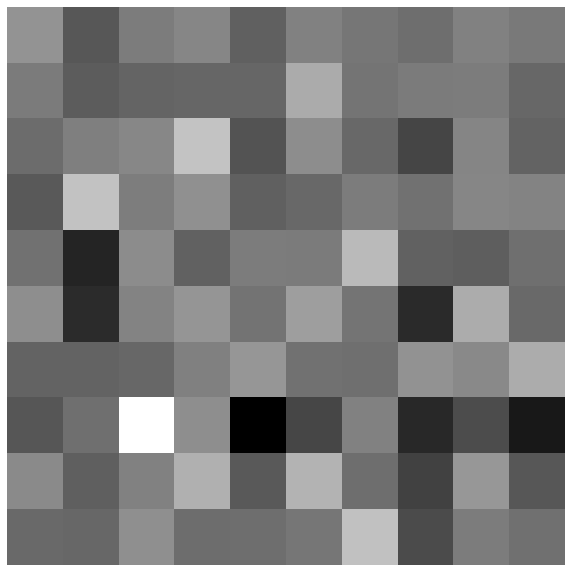

In [115]:
plot(y2[0:10,:])

In [116]:
y

tensor([[ 3.2924e+00, -5.7726e+00, -1.7044e-01,  1.3008e+00, -4.4421e+00,
          4.6569e-01, -1.1912e+00, -2.4233e+00,  5.1953e-01, -5.0228e-01],
        [-3.8436e-01, -5.0991e+00, -3.9270e+00, -3.5032e+00, -3.6310e+00,
          6.8512e+00, -1.4765e+00, -4.2701e-01, -2.2912e-01, -3.4639e+00],
        [-2.6447e+00,  1.6442e-01,  1.4751e+00,  1.0533e+01, -6.4284e+00,
          2.2906e+00, -3.2031e+00, -8.6151e+00,  1.1800e+00, -3.9522e+00],
        [-5.4210e+00,  1.0354e+01, -1.5568e-01,  2.7311e+00, -4.4543e+00,
         -3.3010e+00, -2.8535e-01, -1.8562e+00,  1.3160e+00,  1.0202e+00],
        [-1.9683e+00, -1.3523e+01,  2.1414e+00, -4.2938e+00, -1.7682e-01,
         -4.6572e-01,  9.2008e+00, -4.1476e+00, -4.7054e+00, -2.2493e+00],
        [ 2.4291e+00, -1.2538e+01,  7.9440e-01,  3.5848e+00, -1.6243e+00,
          4.8601e+00, -1.4299e+00, -1.2581e+01,  7.0395e+00, -3.0686e+00],
        [-4.0944e+00, -3.9884e+00, -3.4321e+00,  2.9366e-01,  3.7546e+00,
         -1.7719e+00, -2.1590e+0

In [ ]:
one_hot (y)

In [ ]:
plot(one_hot(y))

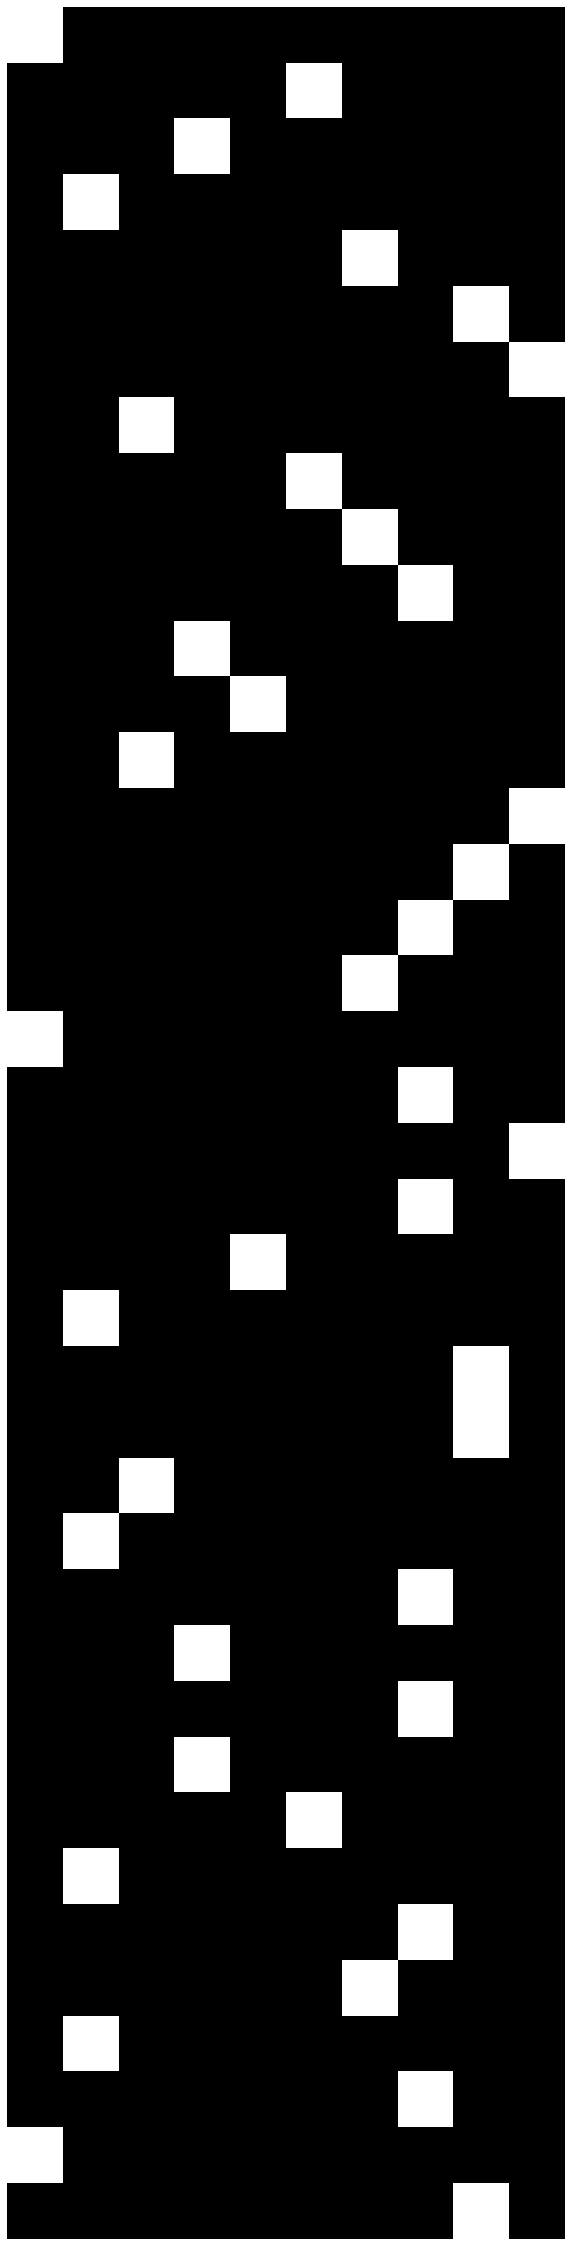

In [118]:
plot(one_hot(torch.argmax(y2,1)))

In [119]:
y

tensor([[ 3.2924e+00, -5.7726e+00, -1.7044e-01,  1.3008e+00, -4.4421e+00,
          4.6569e-01, -1.1912e+00, -2.4233e+00,  5.1953e-01, -5.0228e-01],
        [-3.8436e-01, -5.0991e+00, -3.9270e+00, -3.5032e+00, -3.6310e+00,
          6.8512e+00, -1.4765e+00, -4.2701e-01, -2.2912e-01, -3.4639e+00],
        [-2.6447e+00,  1.6442e-01,  1.4751e+00,  1.0533e+01, -6.4284e+00,
          2.2906e+00, -3.2031e+00, -8.6151e+00,  1.1800e+00, -3.9522e+00],
        [-5.4210e+00,  1.0354e+01, -1.5568e-01,  2.7311e+00, -4.4543e+00,
         -3.3010e+00, -2.8535e-01, -1.8562e+00,  1.3160e+00,  1.0202e+00],
        [-1.9683e+00, -1.3523e+01,  2.1414e+00, -4.2938e+00, -1.7682e-01,
         -4.6572e-01,  9.2008e+00, -4.1476e+00, -4.7054e+00, -2.2493e+00],
        [ 2.4291e+00, -1.2538e+01,  7.9440e-01,  3.5848e+00, -1.6243e+00,
          4.8601e+00, -1.4299e+00, -1.2581e+01,  7.0395e+00, -3.0686e+00],
        [-4.0944e+00, -3.9884e+00, -3.4321e+00,  2.9366e-01,  3.7546e+00,
         -1.7719e+00, -2.1590e+0

In [121]:
torch.argmax(y2,1) #returns the indices of the maximum values of the input tensor across a specified dimension/axis.
#f the input tensor exists with multiple maximal values then the function will return the index of the first maximal element.

tensor([0, 5, 3, 1, 6, 8, 9, 2, 5, 6, 7, 3, 4, 2, 9, 8, 7, 6, 0, 7, 9, 7, 4, 1,
        8, 8, 2, 1, 7, 3, 7, 3, 5, 1, 7, 6, 1, 7, 0, 8], device='cuda:0')

In [122]:
b

40

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b 
#Returns the sum of all elements in the input tensor.

In [124]:
X.shape

torch.Size([60000, 784])

In [125]:
%%timeit
X[20000]@W

27 µs ± 605 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [126]:
torch.argmax(X@W,1)

tensor([5, 0, 4,  ..., 5, 6, 8], device='cuda:0')

In [127]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [128]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.9122, device='cuda:0')

In [129]:
X@W

tensor([[  1.1735,  -5.3252,  -2.2280,  ...,   2.8160,  -2.5256,  -4.7146],
        [ 14.1848, -13.8266,  -2.0614,  ...,  -2.7536,  -0.4526,  -5.3169],
        [ -3.9527,  -9.5646,  -3.1270,  ...,  -0.5796,  -2.7272,   0.5264],
        ...,
        [  1.7139,  -3.4259, -10.8608,  ...,  -0.3874,   5.0143,   0.4739],
        [  3.0898, -10.5911,  -2.0102,  ...,  -4.0874,  -7.1931,  -2.6339],
        [  2.8741,  -6.6511,  -1.8780,  ...,  -3.2709,   7.5771,   1.3491]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [130]:
W.shape

torch.Size([784, 10])

In [131]:
W[:,0].shape

torch.Size([784])

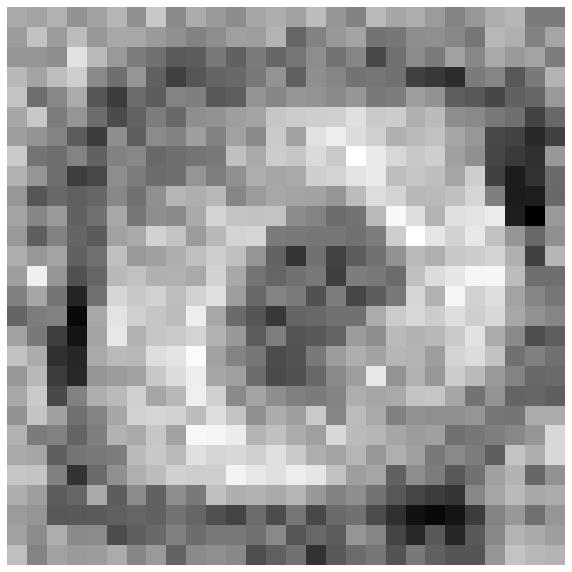

In [132]:
plot(W[:,0].reshape(28,28))

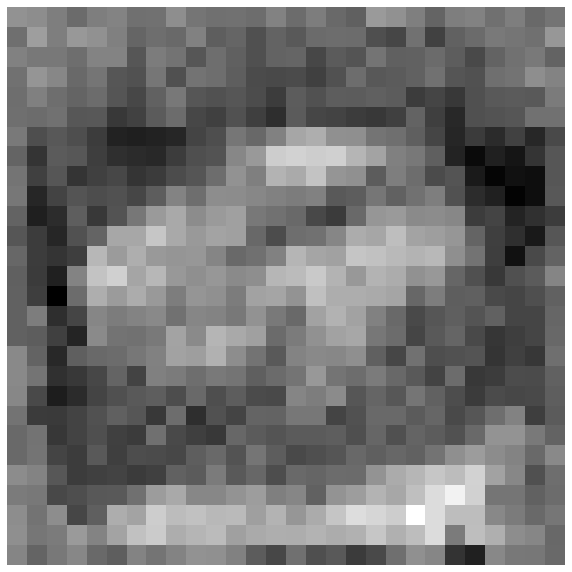

In [133]:
plot(W[:,9].reshape(28,28))

In [134]:
W.shape

torch.Size([784, 10])

In [135]:
(W.T).shape

torch.Size([10, 784])

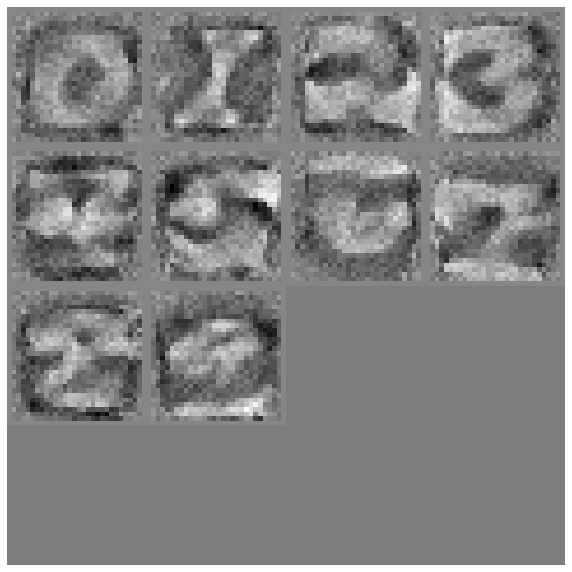

In [136]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [137]:
###################################################

In [138]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [139]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [140]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [141]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [142]:
X.shape

torch.Size([60000, 784])

In [143]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [144]:
def model(x,w):

    return x@w[0]

In [145]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 1000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    # if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

#Generator

In [147]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [148]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [149]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [150]:
batch_size = 512

In [151]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [152]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [153]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [154]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [155]:
###################################################

In [156]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [157]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [158]:
X = (X + 1)/2
X_test = (X_test + 1)/2

In [159]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [160]:
x,y = get_batch('train')

(array([285709.,  13255.,  10166.,   9578.,  10361.,  10895.,  13836.,
         17888.,  19555.,  10165.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

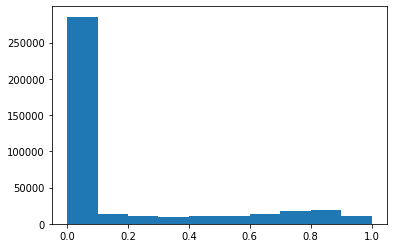

In [161]:
plt.hist(x.flatten().cpu().numpy())

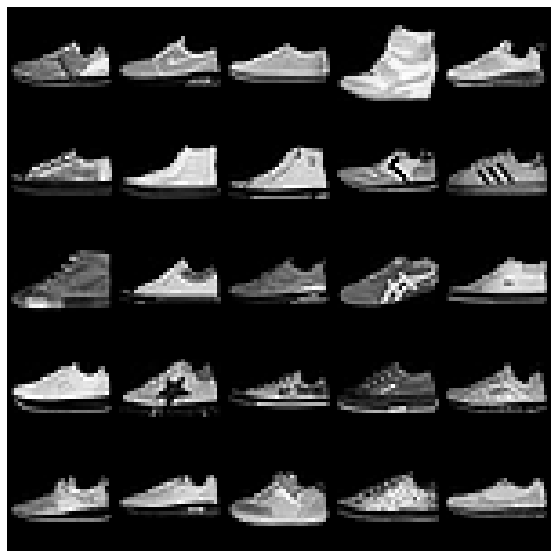

In [162]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [163]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)

def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [164]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [165]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)

In [166]:
def Encoder(x,w):
    return x@w[0]

In [167]:
def Decoder(x,w):
    return x@(w[0].T)

In [168]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [169]:
batch_size = 512
steps = 10000
learning_rate = 4e-3

In [170]:
w0 = GPU(randn_trunc((784,78)))
w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item())

0.4203895926475525
0.004169858060777187
0.003542865626513958
0.00368899991735816
0.0033372244797647
0.0033110491931438446
0.0035607917234301567
0.0034325243905186653
0.003771271323785186
0.006291135214269161


In [171]:
# batch_size = 16

In [172]:
x,y = get_batch('test')

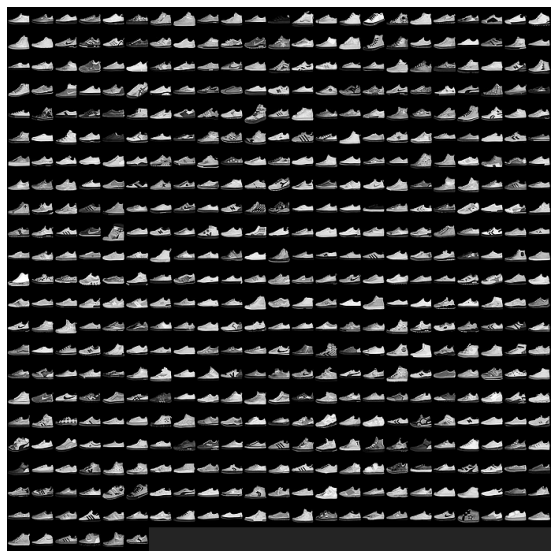

In [173]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy())

In [174]:
x.shape

torch.Size([512, 784])

In [175]:
Decoder(Encoder(x,w),w).shape

torch.Size([512, 784])

In [176]:
x2 = Autoencoder(x,w)

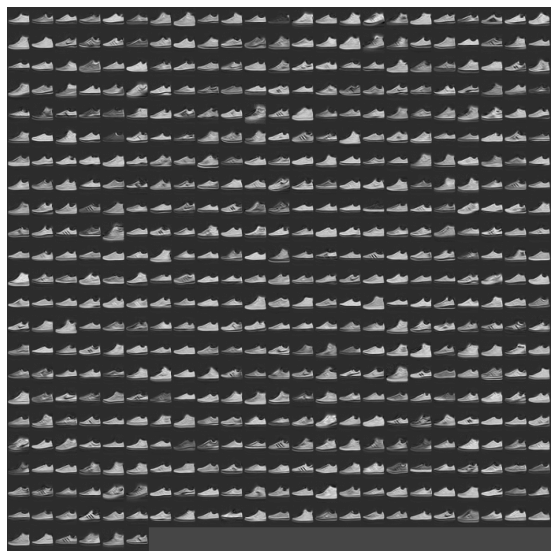

In [177]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

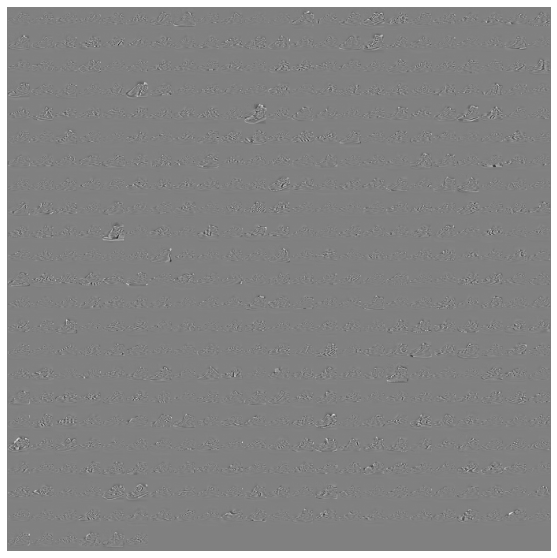

In [178]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy())

In [179]:
w[0].shape

torch.Size([784, 78])

In [180]:
wp = w[0].T 

In [181]:
wp = wp.reshape(-1,28,28)

In [182]:
wp.shape

torch.Size([78, 28, 28])

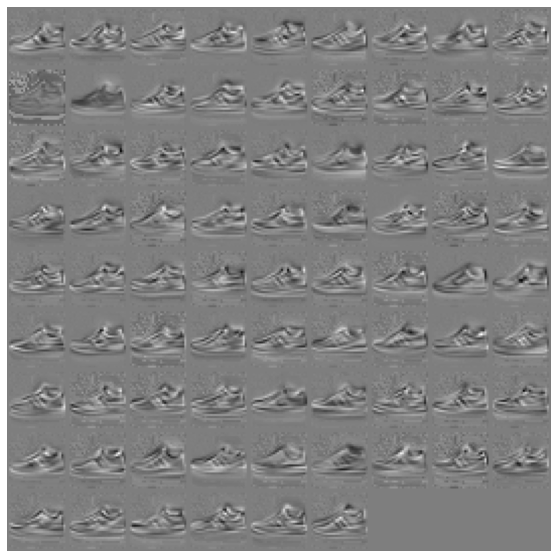

In [183]:
montage_plot(wp.detach().cpu().numpy())

In [184]:
x.shape

torch.Size([512, 784])

In [185]:
x = x[0:1]

In [186]:
y = Encoder(x,w)

In [187]:
y.shape

torch.Size([1, 78])

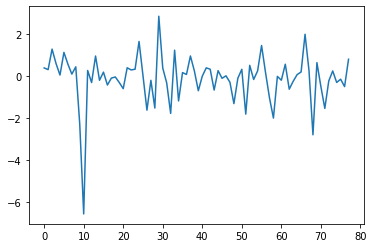

In [188]:
plt.plot(y[0].cpu().detach().numpy())

In [189]:
noise = 0.5*np.random.randn(78)

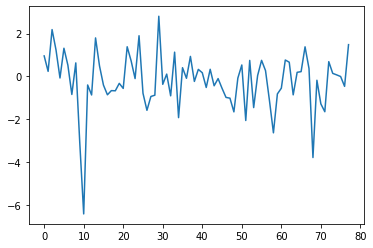

In [190]:
plt.plot(y[0].cpu().detach().numpy() + noise)

In [191]:
noise

array([ 0.55373353, -0.08519266,  0.88294462,  0.61695157, -0.13478376,
        0.17052021, -0.06001507, -0.94783995,  0.17498194, -0.79032396,
        0.15557132, -0.67859929, -0.56784992,  0.82435219,  0.67552321,
       -0.60566077, -0.4421043 , -0.57848647, -0.63957198, -0.02869212,
        0.02828267,  0.97276517,  0.41807488, -0.43906304,  0.23179495,
       -0.81623584,  0.0334411 , -0.74514579,  0.63648986, -0.06328357,
       -0.76436363,  0.42243318,  0.8638663 , -0.11805331, -0.74672887,
        0.22679966, -0.17749925, -0.03956223, -0.4912752 ,  1.0128222 ,
        0.16473226, -0.92019203, -0.00826955,  0.2183131 , -0.37302238,
       -0.4608118 , -1.00209888, -0.72894511, -0.35182818,  0.01205994,
        0.19578477, -0.25208833,  0.2201299 , -1.30200863, -0.22112371,
       -0.72311317,  0.08655405, -0.106741  , -0.6374917 , -0.81274587,
       -0.36400176,  0.18632592,  1.27437171, -0.62343813,  0.10706526,
        0.01408909, -0.62820722,  0.10116207, -0.99085089, -0.83

In [192]:
noise = GPU(noise)

In [193]:
x2 = Decoder(y+noise,w)

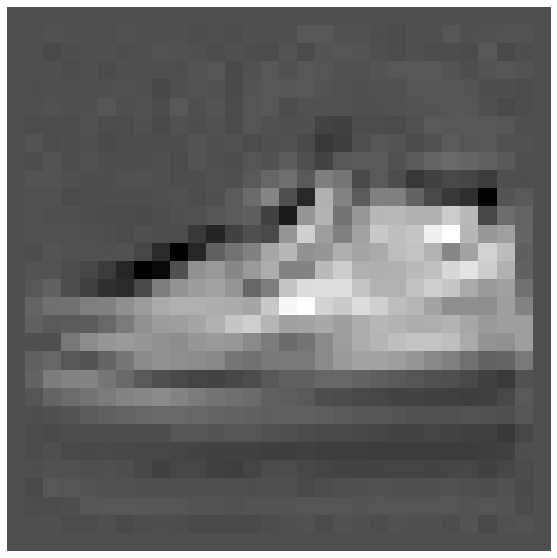

In [194]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

In [195]:
x2 = Decoder(y,w)

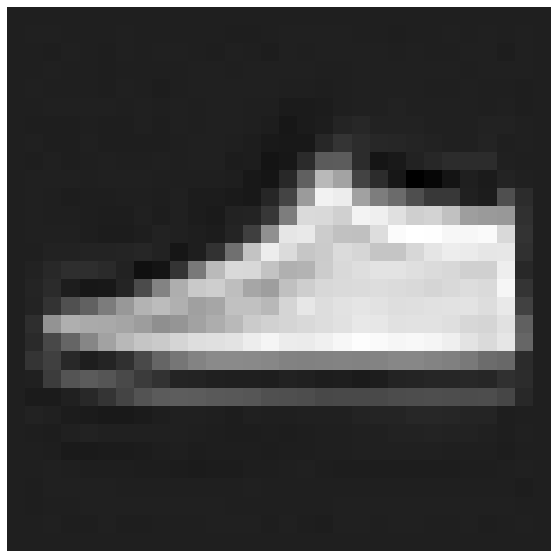

In [196]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())